# Pregunta 1 G comparacion de LDA, QDA y KNN

In [2]:
import urllib
import pandas as pd
train_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.train"
test_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.test"
train_data_f = urllib.urlretrieve(train_data_url, "train_data.csv")
test_data_f = urllib.urlretrieve(test_data_url, "test_data.csv")
train_df = pd.DataFrame.from_csv('train_data.csv',header=0,index_col=0)
test_df = pd.DataFrame.from_csv('test_data.csv',header=0,index_col=0)

In [3]:
from sklearn.preprocessing import StandardScaler
X = train_df.ix[:,'x.1':'x.10'].values
y = train_df.ix[:,'y'].values
X_std = StandardScaler().fit_transform(X)

/home/matias/anaconda2/lib/python2.7/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/home/matias/anaconda2/lib/python2.7/site-packages/sklearn/qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


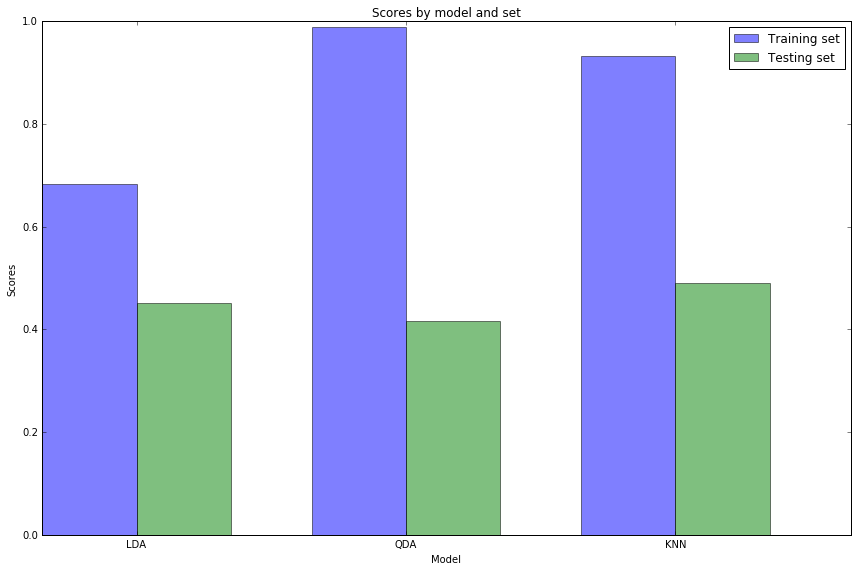

In [4]:
%matplotlib inline
from sklearn.lda import LDA
from sklearn.qda import QDA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
Xtest = test_df.ix[:,'x.1':'x.10'].values
ytest = test_df.ix[:,'y'].values
X_std_test = StandardScaler().fit_transform(Xtest)

train_scores = []
test_scores = []

models = {
    0: LDA(),
    1: QDA(),
    2: KNeighborsClassifier(n_neighbors=10)
}

for i in range(3):
    model = models[i]
    model.fit(X_std,y)
    train_scores.append(model.score(X_std,y))
    test_scores.append(model.score(X_std_test,ytest))

#print train_scores
#print test_scores
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = np.arange(3)
labels = ('LDA', 'QDA', 'KNN')
rects1 = plt.bar(index, train_scores, bar_width, alpha = 0.5, color='b',label='Training set')
rects2 = plt.bar(index + bar_width, test_scores, bar_width, alpha = 0.5, color='g',label='Testing set')

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Scores by model and set')
plt.xticks(index + bar_width, labels)
plt.legend()

plt.tight_layout()
plt.show()

## Comparacion de técnicas

Al comparar las técnicas se observa que QDA tiene mejores resultados en el training set con una precisión de 0.988, sin embargo, a su vez es el modelo que peor precision alcanza con el testing set, llegando a un valor de 0.412. Por lo que se infiere que el modelo esta sobre ajustado. Por otra parte el modelo KNN se comporta mejor sobre el conjunto de test alcanzando casi un 50% de precisión (0.49). Es importante destacar que a pesar de que los modelos testeados tienden a sobre-ajustarse, la mayor precisión alcanzada según la información entregada por los investigadores es de un 54%.

# Variación de K en modelo KNN

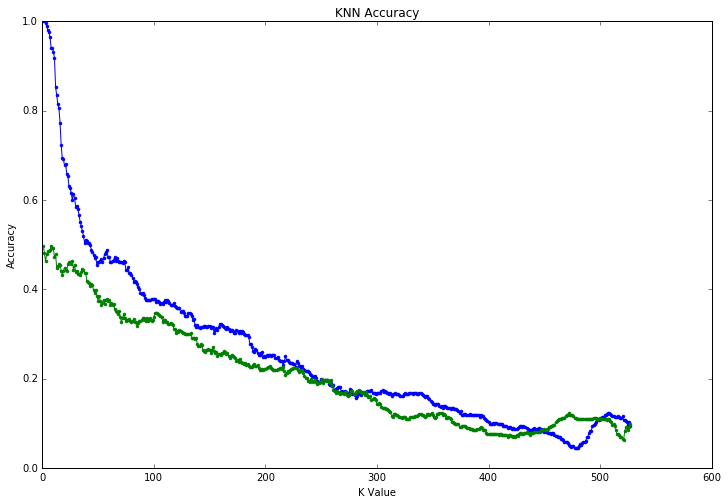

In [6]:
train_score = []
test_score = []
kmax = 528
for i in range(1,kmax):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_std,y)
    train_score.append(knn_model.score(X_std,y))
    test_score.append(knn_model.score(X_std_test,ytest))
plt.figure(figsize=(12, 8))
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy')
plt.plot(range(1,kmax),train_score,'-b.')
plt.plot(range(1,kmax),test_score,'-g.')
plt.show()

Se observa que al aumentar K la precisión del modelo tiende a disminuir. De este análisis se puede inferir que, es posible que en el espacio 11 dimensional en el que se representa la data las distintas clases estan superpuestas unas con otras. Esto, debido a que la precisión baja drásticamente al considerar 40 vecinos que es aporximadamente un 8% del set de datos. Otra situación que puede explicar esta baja de precisión, es que al considerar más vecinos se alcanzan regiones más lejanas del espacio 11 dimensional. Si se considerara un caso ideal en el que los ejemplos de una misma clase estan cercanos entre sí, y alejados a la vez de las otras clases. El abarcar mas ejemplos y por lo tanto, abarcar una proporción mayor  del espacio de representación explicaría aumento en el error de clasificación.